<a href="https://colab.research.google.com/github/HarshavardhanBhupathi/Data-science/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix




In [ ]:
hd=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None)

In [ ]:
hd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
hd.shape

(303, 14)

In [ ]:

hd.columns=['age','sex','chestpain','restbp','cholest','fbs','restecg','maxhrtach','exang','oldpeak','slope','ca','thal','hd']

In [ ]:
hd

,age,sex,chestpain,restbp,cholest,fbs,restecg,maxhrtach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
hd.isnull().sum()

age          0
sex          0
chestpain    0
restbp       0
cholest      0
fbs          0
restecg      0
maxhrtach    0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
hd           0
dtype: int64

In [ ]:
hd.dtypes

age          float64
sex          float64
chestpain    float64
restbp       float64
cholest      float64
fbs          float64
restecg      float64
maxhrtach    float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
hd             int64
dtype: object

In [ ]:
hd['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
hd['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

'?' indicates missing values 

In [ ]:
hd.loc[hd.values=='?']

,age,sex,chestpain,restbp,cholest,fbs,restecg,maxhrtach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Just 6 rows contain missing values so can remove 6 out of 303 rows

In [ ]:
hd=hd.drop(axis=0,index=(hd.loc[hd.values=='?']).index)

In [ ]:
hd

,age,sex,chestpain,restbp,cholest,fbs,restecg,maxhrtach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


Seperation of dependent and independent variables

In [ ]:
x=hd.drop('hd',axis=1).copy()

In [ ]:
y=hd.drop(['age','sex','chestpain','restbp','cholest','fbs','restecg','maxhrtach','exang','oldpeak','slope','ca','thal'],axis=1)

In [ ]:
y

,hd
0,0
1,2
2,1
3,0
4,0
...,...
297,1
298,1
299,2
300,3


In [ ]:
x.dtypes

age          float64
sex          float64
chestpain    float64
restbp       float64
cholest      float64
fbs          float64
restecg      float64
maxhrtach    float64
exang        float64
oldpeak      float64
slope        float64
ca            object
thal          object
dtype: object

One hot encoding is required for categorical data 

In [ ]:
x['chestpain'].unique()

array([1., 4., 3., 2.])

In [ ]:
x['sex'].unique()

array([1., 0.])

In [ ]:
x['cholest'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 160., 394., 184., 315., 409., 244., 195., 196.,
       126., 313., 259., 200., 262., 215., 228., 193., 271., 210., 327.,
       149., 295., 306., 178., 237., 218., 223., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [ ]:
x['fbs'].unique()

array([1., 0.])

In [ ]:
x['maxhrtach'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 149., 145., 146., 175., 186.,
       185., 159., 130., 190., 136.,  97., 127., 154., 133., 126., 202.,
       103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105., 194.,
       195., 106., 115., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.])

In [ ]:
for i in x.columns:
  print(i,x[i].unique())

age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
chestpain [1. 4. 3. 2.]
restbp [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
cholest [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318.

In [ ]:
x_enc= pd.get_dummies(x,columns=['chestpain','slope','thal','restecg'])

## the other attributes like sex contains only two categories so thats not important encode them for classifiction

Our simple classification tells whether the person has a heart disease or not so its just requires only two categories 0 and 1 . 

In [ ]:
y['hd'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
yind=y>0
y[yind]=1

In [ ]:
y

,hd
0,0
1,1
2,1
3,0
4,0
...,...
297,1
298,1
299,1
300,1


In [ ]:
y['hd'].unique()

array([0, 1])

A preliminary classification trees

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_enc,y,random_state=42)

Build a decision tree and fit the training data to model.

In [ ]:
dec= DecisionTreeClassifier(random_state=42)
dec= dec.fit(x_train,y_train)

[Text(639.7758620689656, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No Heart Disease'),
 Text(370.39655172413796, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No Heart Disease'),
 Text(226.08620689655174, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No Heart Disease'),
 Text(163.55172413793105, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No Heart Disease'),
 Text(96.20689655172414, 254.81249999999997, 'cholest <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No Heart Disease'),
 Text(57.72413793103449, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No Heart Disease'),
 Text(38.48275862068966, 186.86249999999998, 'restbp <= 106.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No Heart Disease'),
 Text(19.24137931034483, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4

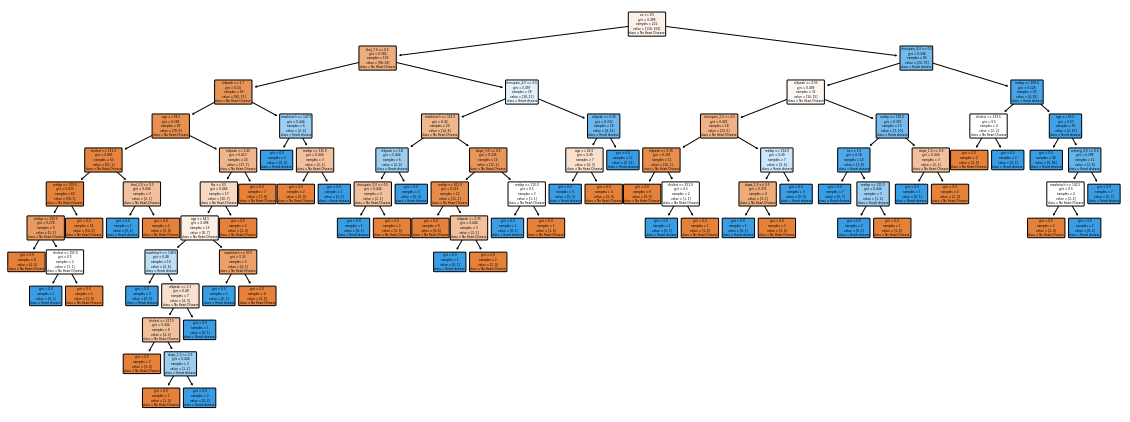

In [ ]:
plt.figure(figsize=(20,7.5))
plot_tree(dec,feature_names=x_enc.columns,class_names=['No Heart Disease','Heart disease'],rounded=True,filled=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


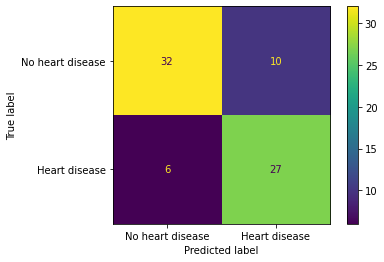

In [ ]:
plot_confusion_matrix(dec,x_test,y_test,display_labels=['No heart disease','Heart disease'])

out of 42 people having no heart disease, 32 were correctly classified.

so check whether its overfit and try optimizing the classification by pruning the tree. 

In [ ]:
ccp=dec.cost_complexity_pruning_path(x_train,y_train) ##finding values for alpha
ccp_alp=ccp.ccp_alphas ##extracting distinct values of alpha
ccp_alp=ccp_alp[:-1] ##excluding max alpha (root)
ccp_alp

array([0.        , 0.00295295, 0.003861  , 0.00405405, 0.004095  ,
       0.00429358, 0.00514801, 0.00541298, 0.00578761, 0.00600601,
       0.00600601, 0.00600601, 0.00667591, 0.00675676, 0.00757375,
       0.00811505, 0.00868726, 0.00889851, 0.01038181, 0.0105777 ,
       0.01422475, 0.01604051, 0.01642461, 0.02103075, 0.03680006,
       0.03934523])

build decision tree for each alpha value and stored it in a list

In [ ]:
l=[]
for i in ccp_alp:
  dec=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
  dec.fit(x_train,y_train)
  l.append(dec)

Finding accuracy of trees using train and test data as function of alpha 

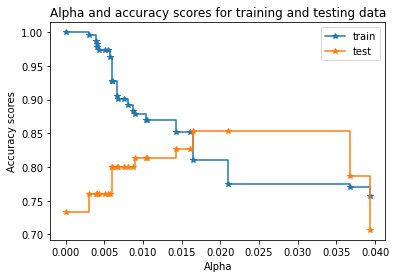

In [ ]:
train_scores=[dec.score(x_train,y_train) for dec in l]
test_scores=[dec.score(x_test,y_test) for dec in l]
fig,q= plt.subplots()
q.set_xlabel('Alpha')
q.set_ylabel('Accuracy scores')
q.set_title('Alpha and accuracy scores for training and testing data')
q.plot(ccp_alp,train_scores,marker='*',label='train',drawstyle='steps-post')
q.plot(ccp_alp,test_scores,marker='*',label='test',drawstyle='steps-post')
q.legend()
plt.show()

so at alpha=0.016 testing data has reached it maximum score where training data is about to drop off later this alpha value. so set alpha=0.016

Here is a query like how well and effective , data is divided into train and test data . to find out best way whether we used, simply perform cross validation (10 folds or 5 folds)

In [ ]:
dec= DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)
scores=cross_val_score(dec,x_train,y_train,cv=5)
dataf=pd.DataFrame(data={'tree':range(5),'accuracy_score':scores})
dataf

,tree,accuracy_score
0,0,0.533333
1,1,0.866667
2,2,0.750000
3,3,0.750000
4,4,0.772727


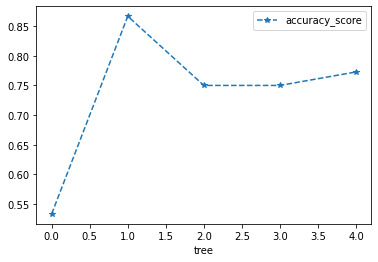

In [ ]:
dataf.plot(x='tree',y='accuracy_score',marker='*',linestyle='--')


In [ ]:
l2=[]
for i in ccp_alp:
  dec=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
  scores=cross_val_score(dec,x_train,y_train,cv=5)
  l2.append([i,np.mean(scores),np.std(scores)])



In [ ]:
l2

[[0.0, 0.688989898989899, 0.11508122965734677],
 [0.0029529529529529544, 0.688989898989899, 0.11508122965734677],
 [0.003861003861003862, 0.688989898989899, 0.11508122965734677],
 [0.004054054054054055, 0.688989898989899, 0.11508122965734677],
 [0.004095004095004095, 0.688989898989899, 0.11508122965734677],
 [0.004293579293579285, 0.688989898989899, 0.11508122965734677],
 [0.005148005148005148, 0.6844444444444444, 0.11482560649146176],
 [0.005412976001211295, 0.6890909090909091, 0.12065469469313968],
 [0.005787605787605791, 0.7072727272727273, 0.1249616204727042],
 [0.006006006006006006, 0.7072727272727273, 0.1249616204727042],
 [0.006006006006006006, 0.7072727272727273, 0.1249616204727042],
 [0.006006006006006006, 0.7072727272727273, 0.1249616204727042],
 [0.006675906675906675, 0.7072727272727273, 0.1249616204727042],
 [0.006756756756756757, 0.7072727272727273, 0.1249616204727042],
 [0.007573750220809049, 0.7072727272727273, 0.1249616204727042],
 [0.008115048793014888, 0.7117171717171

In [ ]:
df3=pd.DataFrame(l2,columns=['alpha','mean(score)','std(score)'])

In [ ]:
df3

,alpha,mean(score),std(score)
0,0.000000,0.688990,0.115081
1,0.002953,0.688990,0.115081
2,0.003861,0.688990,0.115081
3,0.004054,0.688990,0.115081
4,0.004095,0.688990,0.115081
5,0.004294,0.688990,0.115081
6,0.005148,0.684444,0.114826
7,0.005413,0.689091,0.120655
8,0.005788,0.707273,0.124962
9,0.006006,0.707273,0.124962


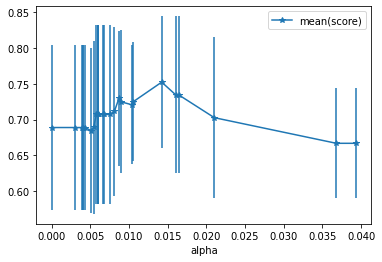

In [ ]:
df3.plot(x='alpha',y='mean(score)',yerr='std(score)',marker='*')

In [ ]:
ealpha= df3[(df3['alpha']>0.014) & (df3['alpha']<0.015)]['alpha']

In [ ]:
ealpha= float(ealpha)

In [ ]:
ealpha

0.014224751066856332

Got ideal value of alpha . so lets build final classification tree

In [ ]:
prun_dec=DecisionTreeClassifier(random_state=42,ccp_alpha=ealpha)
prun_dec=prun_dec.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


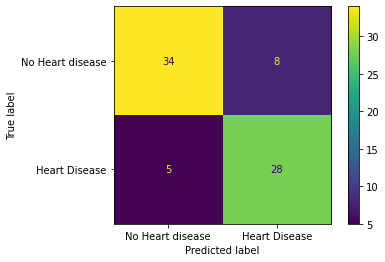

In [ ]:
plot_confusion_matrix(prun_dec,x_test,y_test,values_format='d',display_labels=['No Heart disease','Heart Disease'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No Heart disease'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No Heart disease'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No Heart disease'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No Heart disease'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Heart Disease'),
 Text(386.3076923076923, 152.8875, 'chestpain_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Heart Disease'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No Heart disease'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Heart Disease'),
 Text(708.2307692307693, 25

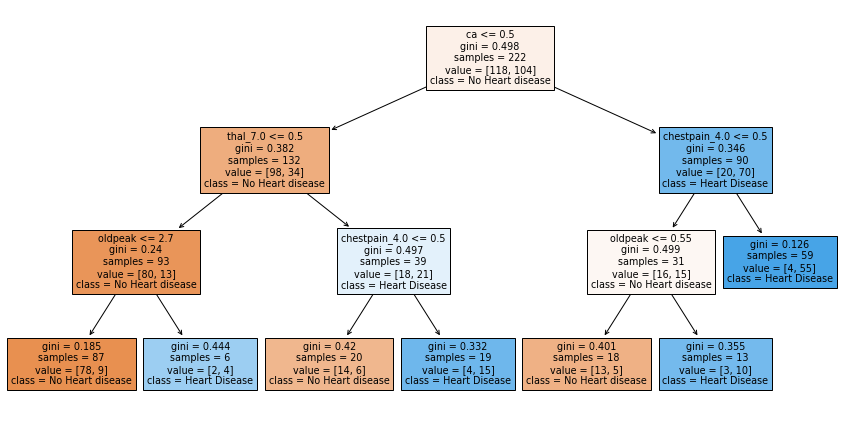

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(prun_dec,class_names=['No Heart disease','Heart Disease'],filled=True,feature_names=x_train.columns)
